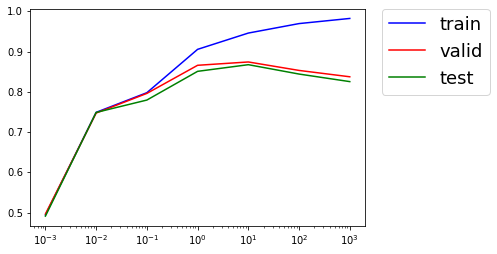

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import matplotlib.pyplot as plt
from q51_2 import load_data

#データをロード
X_train=load_data("train.feature.txt")
X_valid=load_data("valid.feature.txt")
X_test=load_data("test.feature.txt")
Y_train=load_data("train.txt")["CATEGORY"]
Y_valid=load_data("valid.txt")["CATEGORY"]
Y_test=load_data("test.txt")["CATEGORY"]

#print(X_train)
#print(Y_train)
#print(np.logspace(-3, 3,num=7))
accuracy_train=[]
accuracy_valid=[]
accuracy_test=[]
hyper_param=np.logspace(-3, 3,num=7)

for c in hyper_param:#10^(-3)~10^3までハイパーパラメータを変更
    lr = LogisticRegression(max_iter=2000,C=c)#ハイパーパラメータを指定して、インスタンスを作成
    lr.fit(X_train, Y_train)#重みを学習
    
    #予測
    pred_train=lr.predict(X_train)
    pred_valid=lr.predict(X_valid)
    pred_test=lr.predict(X_test)
    
    #リストに正解率を追加
    accuracy_train.append(accuracy_score(Y_train, pred_train))
    accuracy_valid.append(accuracy_score(Y_valid, pred_valid))
    accuracy_test.append(accuracy_score(Y_test, pred_test))

fig, ax = plt.subplots()
ax.plot(hyper_param, accuracy_train, color="blue", label="train")
ax.plot(hyper_param, accuracy_valid, color="red", label="valid")
ax.plot(hyper_param, accuracy_test, color="green", label="test")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()